In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
# Setting random seed to get reproducible runs
RSEED = 100

# Part 1: Data Processing

In [2]:
data = pd.read_csv("cancer_industry.csv")

In [112]:
#data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
data.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'ACID', 'ENRG', 'ETOX', 'EUTR',
       'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS',
       'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG',
       'VADD', 'WATR'],
      dtype='object')

In [4]:
factors=np.array(['ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'])

In [5]:
data

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
1,"Autauga County(6,10)",1001,county,3,1,alabama,Oral Cavity & Pharynx,8,13.5,9.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
2,"Autauga County(6,10)",1001,county,17,1,alabama,Esophagus,0,0.0,0.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
3,"Autauga County(6,10)",1001,county,18,1,alabama,Stomach,6,9.1,6.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
4,"Autauga County(6,10)",1001,county,20,1,alabama,Colon & Rectum,32,52.2,44.2,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,county,86,56,wyoming,Non-Hodgkin Lymphoma,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72055,"Weston County(6,10)",56045,county,90,56,wyoming,Leukemia,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72056,"Weston County(6,10)",56045,county,400,56,wyoming,Breast (in situ) (Female),0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72057,"Weston County(6,10)",56045,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450


In [6]:
#def split_keep_first(text):
#    return text.split()[0]
print(data.dtypes)
#data['incidence rate_per_100000'].replace({r'[^\x00-\x7F]':'0'}, regex=True, inplace=True)
#data['incidence rate_per_100000'] = data['incidence rate_per_100000'].str.replace(r'[^0-9]+', '')
#data['incidence rate_per_100000'] = data['incidence rate_per_100000'].astype("str")
#data['incidence rate_per_100000'] = data['incidence rate_per_100000'].apply(split_keep_first)
data['incidence rate_per_100000'] = data['incidence rate_per_100000'].astype("float64")
data

locale                                 object
fips                                    int64
areatype                               object
cancer                                  int64
stateFIPS                               int64
state                                  object
cancer_description                     object
annual_count_avg                        int64
incidence rate_per_100000             float64
incidence rate_lower_95_confidence    float64
incidence rate_upper_95_confidence    float64
ACID                                  float64
ENRG                                  float64
ETOX                                  float64
EUTR                                  float64
FOOD                                  float64
GCC                                   float64
HAPS                                  float64
HAZW                                  float64
HC                                    float64
HNC                                   float64
HRSP                              

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
1,"Autauga County(6,10)",1001,county,3,1,alabama,Oral Cavity & Pharynx,8,13.5,9.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
2,"Autauga County(6,10)",1001,county,17,1,alabama,Esophagus,0,0.0,0.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
3,"Autauga County(6,10)",1001,county,18,1,alabama,Stomach,6,9.1,6.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
4,"Autauga County(6,10)",1001,county,20,1,alabama,Colon & Rectum,32,52.2,44.2,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,county,86,56,wyoming,Non-Hodgkin Lymphoma,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72055,"Weston County(6,10)",56045,county,90,56,wyoming,Leukemia,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72056,"Weston County(6,10)",56045,county,400,56,wyoming,Breast (in situ) (Female),0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72057,"Weston County(6,10)",56045,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450


In [117]:
#population = pd.read_csv("sex.csv")
#population

In [53]:
#pop1=population[["fips","people (female)"]]
#pop2=population[["fips","people (male)"]]
#pop1=pop1.dropna(axis='index')
#pop2=pop2.dropna()
#pop=pop1.merge(pop2,on='fips')
##pop.dropna(axis='index')
#pop

In [52]:
#pop.drop_duplicates()
#pop

In [51]:
#data2 = pd.merge(data1, pop, on='fips', how='inner')
#data2.head(20)

In [50]:
#data2

In [49]:
#data2["population"]=data2.apply(lambda row: row["people (female)"] + row["people (male)"], axis=1)
#data2

In [48]:
#for i in ['ACID', 'ENRG', 'ETOX',
#       'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX',
#       'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN',
#       'SMOG', 'VADD', 'WATR']:
#    data2[i] = data2.apply(lambda row: row[i] / row["population"], axis=1)
#data2

In [47]:
#data

In [31]:
#data=data2

In [7]:
data.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'ACID', 'ENRG', 'ETOX', 'EUTR',
       'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS',
       'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG',
       'VADD', 'WATR'],
      dtype='object')

In [8]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516])

In [9]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [10]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==3
print("example:")
print(cancerTypes[cancer]["cancer_description"].to_string())

cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    Non-H

# Part 2: Random Forest Regressor

## Hypertuning

In [80]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [14]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64]}
rf = RandomForestRegressor(random_state = RSEED)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_

In [15]:
print(clf.best_params_)

{'max_depth': 8, 'n_estimators': 100}


## Random Forest Loop

cancer type: 1
0    All Cancer Sites
Creating RandomForest Model and Fitting the Data
score 0.8557931714466026
Feature Importance
indecis: [ 4 14 16 12 18  3 19  2  6  7 22 10  0  8 13  5 17 11 15 20  1 23  9 21]
importances: [0.52370794 0.08519115 0.07232734 0.06012977 0.03656999 0.03585955
 0.0324252  0.02914219 0.02874697 0.02091755 0.01439032 0.01332506
 0.00696646 0.00542978 0.00535063 0.0049534  0.00460099 0.00434863
 0.00433481 0.0035827  0.0027817  0.00214119 0.00159213 0.00118456]
features: ['FOOD' 'METL' 'MSW' 'JOBS' 'OZON' 'EUTR' 'PEST' 'ETOX' 'HAPS' 'HAZW'
 'VADD' 'HRSP' 'ACID' 'HC' 'LAND' 'GCC' 'NREN' 'HTOX' 'MINE' 'REN' 'ENRG'
 'WATR' 'HNC' 'SMOG']


cancer type: 3
1    Oral Cavity & Pharynx
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8768754252320395
Feature Importance
indecis: [ 4 16 14 18  7  6  3  2 12 19  9 22 10  1 15 11 20 17  5  8 13  0 21 23]
importances: [0.59758527 0.06976628 0.05510933 0.04732653 0.0386699  0.03278587
 0.02410143 0.02192258 0.02152848 0.0181793  0.01282756 0.01093913
 0.01043627 0.00606654 0.00494659 0.00424918 0.00408984 0.00371395
 0.00369486 0.00352338 0.00332816 0.00203688 0.0019163  0.0012564 ]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'HAZW' 'HAPS' 'EUTR' 'ETOX' 'JOBS' 'PEST'
 'HNC' 'VADD' 'HRSP' 'ENRG' 'MINE' 'HTOX' 'REN' 'NREN' 'GCC' 'HC' 'LAND'
 'ACID' 'SMOG' 'WATR']


cancer type: 17
2    Esophagus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8126109753659849
Feature Importance
indecis: [ 4 14 16  3  6 18 12 22  2 19  7  9 15 10  8 20 13 17 21  1 23  0 11  5]
importances: [0.58487904 0.09122646 0.05955583 0.03491759 0.03474464 0.02903057
 0.02264515 0.02069096 0.01944539 0.01911511 0.01535919 0.01092014
 0.01029124 0.00779684 0.00744888 0.00506175 0.00445647 0.00387381
 0.00342609 0.00338771 0.00336709 0.00314824 0.00284145 0.00237037]
features: ['FOOD' 'METL' 'MSW' 'EUTR' 'HAPS' 'OZON' 'JOBS' 'VADD' 'ETOX' 'PEST'
 'HAZW' 'HNC' 'MINE' 'HRSP' 'HC' 'REN' 'LAND' 'NREN' 'SMOG' 'ENRG' 'WATR'
 'ACID' 'HTOX' 'GCC']


cancer type: 18
3    Stomach
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8410689742037122
Feature Importance
indecis: [ 4 14 12 16 18 22  3 19  2 10  6  7 21  5  0  1 20  8 17 15 13 23  9 11]
importances: [0.27573915 0.1620138  0.15024271 0.05899806 0.0561413  0.04927315
 0.04596889 0.04460871 0.03566597 0.02553172 0.01703326 0.01024851
 0.00989688 0.00888792 0.00812254 0.0075602  0.00731227 0.0068567
 0.00676692 0.00516442 0.0031299  0.00230603 0.00143588 0.0010951 ]
features: ['FOOD' 'METL' 'JOBS' 'MSW' 'OZON' 'VADD' 'EUTR' 'PEST' 'ETOX' 'HRSP'
 'HAPS' 'HAZW' 'SMOG' 'GCC' 'ACID' 'ENRG' 'REN' 'HC' 'NREN' 'MINE' 'LAND'
 'WATR' 'HNC' 'HTOX']


cancer type: 20
4    Colon & Rectum
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8425398635009285
Feature Importance
indecis: [ 4 14 16 12 18  3  6 10 22 19  2 11  7  0 21  8 15 20 13 17  9  5  1 23]
importances: [0.44363662 0.11199983 0.07702921 0.06532516 0.04744467 0.04102555
 0.02835341 0.02659977 0.02546915 0.02545432 0.02059755 0.01709208
 0.0170859  0.00744344 0.00643297 0.00612155 0.00535541 0.00478995
 0.00461205 0.00423743 0.00415846 0.00412384 0.00330537 0.0023063 ]
features: ['FOOD' 'METL' 'MSW' 'JOBS' 'OZON' 'EUTR' 'HAPS' 'HRSP' 'VADD' 'PEST'
 'ETOX' 'HTOX' 'HAZW' 'ACID' 'SMOG' 'HC' 'MINE' 'REN' 'LAND' 'NREN' 'HNC'
 'GCC' 'ENRG' 'WATR']


cancer type: 35
5    Liver & Bile Duct
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8176414891993946
Feature Importance
indecis: [ 4 14 12  3 18 16 10  6 22  8  9  7  2  5 19 17  0 21 15 13 20  1 23 11]
importances: [0.37081816 0.15381159 0.14144129 0.05065606 0.04914385 0.03853569
 0.0270322  0.02362243 0.01832726 0.01769228 0.01500741 0.0149586
 0.01291992 0.01220287 0.00931211 0.00893889 0.00823772 0.00760097
 0.00462847 0.00454546 0.00348329 0.00333775 0.00217462 0.0015711 ]
features: ['FOOD' 'METL' 'JOBS' 'EUTR' 'OZON' 'MSW' 'HRSP' 'HAPS' 'VADD' 'HC' 'HNC'
 'HAZW' 'ETOX' 'GCC' 'PEST' 'NREN' 'ACID' 'SMOG' 'MINE' 'LAND' 'REN'
 'ENRG' 'WATR' 'HTOX']


cancer type: 40
6    Pancreas
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8341414231704023
Feature Importance
indecis: [ 4 14 12 16 18  3  2 22  6 10 19  7  5 11  0  1 20 17  8 13 21 15  9 23]
importances: [0.4917139  0.08702564 0.08654662 0.05643307 0.04568584 0.0422833
 0.03393839 0.03137215 0.02102855 0.02047348 0.01557074 0.0127337
 0.00847639 0.00804395 0.00597464 0.00490805 0.00472606 0.00421267
 0.00403238 0.00389371 0.00357981 0.00356851 0.00189624 0.00188221]
features: ['FOOD' 'METL' 'JOBS' 'MSW' 'OZON' 'EUTR' 'ETOX' 'VADD' 'HAPS' 'HRSP'
 'PEST' 'HAZW' 'GCC' 'HTOX' 'ACID' 'ENRG' 'REN' 'NREN' 'HC' 'LAND' 'SMOG'
 'MINE' 'HNC' 'WATR']


cancer type: 47
7    Lung & Bronchus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.7979727925024641
Feature Importance
indecis: [ 4 16 14  3  6 18 12 19 22  7  2 11 17 15 10  8  1 23 13 20 21  0  5  9]
importances: [0.55637019 0.09665904 0.06120339 0.04156445 0.03840367 0.03375187
 0.02550024 0.02278137 0.0225975  0.01943159 0.017711   0.00807897
 0.00758915 0.00745353 0.006126   0.0057854  0.00517439 0.00512812
 0.00457973 0.00419088 0.00316861 0.00295762 0.00227291 0.00152038]
features: ['FOOD' 'MSW' 'METL' 'EUTR' 'HAPS' 'OZON' 'JOBS' 'PEST' 'VADD' 'HAZW'
 'ETOX' 'HTOX' 'NREN' 'MINE' 'HRSP' 'HC' 'ENRG' 'WATR' 'LAND' 'REN' 'SMOG'
 'ACID' 'GCC' 'HNC']


cancer type: 53
8    Melanoma of the Skin
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8273341322187255
Feature Importance
indecis: [ 4 19  2 18 16  7 12  3 15 14 22 23 20 17  1 13 10  9  5 11  0  6 21  8]
importances: [0.47008997 0.15787701 0.10148176 0.04628683 0.04430176 0.04329075
 0.02840774 0.0223107  0.01207078 0.01172651 0.01166324 0.00698627
 0.00682984 0.00498902 0.00489849 0.00448069 0.00430037 0.00334466
 0.00322855 0.00247461 0.00244511 0.00234734 0.0020877  0.00208028]
features: ['FOOD' 'PEST' 'ETOX' 'OZON' 'MSW' 'HAZW' 'JOBS' 'EUTR' 'MINE' 'METL'
 'VADD' 'WATR' 'REN' 'NREN' 'ENRG' 'LAND' 'HRSP' 'HNC' 'GCC' 'HTOX' 'ACID'
 'HAPS' 'SMOG' 'HC']


cancer type: 55
9    Breast (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8971465502746103
Feature Importance
indecis: [ 4 14 16 12 18  7  3 19  6 10 22  2  9 11  0 21 15 13 17  1  5 23  8 20]
importances: [0.52720649 0.0819845  0.07514831 0.05504982 0.05043698 0.03179584
 0.02685713 0.02467504 0.02202863 0.0218738  0.01965152 0.01589776
 0.01188122 0.00683415 0.00604167 0.00463243 0.00351437 0.0034238
 0.0027671  0.00245754 0.00180586 0.001413   0.00137038 0.00125266]
features: ['FOOD' 'METL' 'MSW' 'JOBS' 'OZON' 'HAZW' 'EUTR' 'PEST' 'HAPS' 'HRSP'
 'VADD' 'ETOX' 'HNC' 'HTOX' 'ACID' 'SMOG' 'MINE' 'LAND' 'NREN' 'ENRG'
 'GCC' 'WATR' 'HC' 'REN']


cancer type: 57
10    Cervix (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.7755848261780651
Feature Importance
indecis: [ 4 14 12  3 16 18  6 22 10  2  9  8  7  5  0 13 11 17 15  1 20 19 23 21]
importances: [0.28492899 0.14318861 0.08883583 0.07395298 0.06457242 0.0638285
 0.04582184 0.03914605 0.0301249  0.02125988 0.02107553 0.01990135
 0.01942334 0.01508874 0.01294685 0.01183379 0.00949382 0.0076089
 0.00606434 0.0051197  0.00499126 0.0042173  0.00360622 0.00296886]
features: ['FOOD' 'METL' 'JOBS' 'EUTR' 'MSW' 'OZON' 'HAPS' 'VADD' 'HRSP' 'ETOX'
 'HNC' 'HC' 'HAZW' 'GCC' 'ACID' 'LAND' 'HTOX' 'NREN' 'MINE' 'ENRG' 'REN'
 'PEST' 'WATR' 'SMOG']


cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8602346303599469
Feature Importance
indecis: [ 4 12 14 18 16  3 22 19  2 10  6  7  0 17 11 21  5  8 15 13 20  1 23  9]
importances: [0.42720735 0.14383351 0.09204474 0.05409168 0.05265638 0.04340696
 0.03498187 0.0268791  0.02238868 0.02173428 0.01910273 0.01393668
 0.00721113 0.0053363  0.00468879 0.00459565 0.00430519 0.00412082
 0.00398157 0.00375214 0.00361975 0.00236975 0.00224616 0.00150879]
features: ['FOOD' 'JOBS' 'METL' 'OZON' 'MSW' 'EUTR' 'VADD' 'PEST' 'ETOX' 'HRSP'
 'HAPS' 'HAZW' 'ACID' 'NREN' 'HTOX' 'SMOG' 'GCC' 'HC' 'MINE' 'LAND' 'REN'
 'ENRG' 'WATR' 'HNC']


cancer type: 61
12    Ovary (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8493102647937654
Feature Importance
indecis: [ 4 14 12 18 16  2  3  7 10 22  6 19  8  0  9 21 15 13 20  1 17 23  5 11]
importances: [0.43848629 0.16393119 0.06173787 0.05881562 0.04788965 0.0304902
 0.02836145 0.02811151 0.0250798  0.02491182 0.02234233 0.02115066
 0.01061956 0.00729372 0.00507003 0.00453699 0.00394384 0.00363596
 0.00335874 0.00275487 0.00271893 0.00224971 0.00134735 0.00116191]
features: ['FOOD' 'METL' 'JOBS' 'OZON' 'MSW' 'ETOX' 'EUTR' 'HAZW' 'HRSP' 'VADD'
 'HAPS' 'PEST' 'HC' 'ACID' 'HNC' 'SMOG' 'MINE' 'LAND' 'REN' 'ENRG' 'NREN'
 'WATR' 'GCC' 'HTOX']


cancer type: 66
13    Prostate (Male)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8749881314630615
Feature Importance
indecis: [ 4 14 12 16 18  3 22  2  6  7 19 10  5  0 21 13 20 17  9 15  1 11  8 23]
importances: [0.49981825 0.10587152 0.08858731 0.06314962 0.03752404 0.03603879
 0.02725102 0.02655652 0.02070815 0.01772689 0.0157631  0.01188593
 0.00613823 0.00588644 0.00584747 0.00515967 0.00492158 0.00443498
 0.00419885 0.00390641 0.00345512 0.00191438 0.00172708 0.00152864]
features: ['FOOD' 'METL' 'JOBS' 'MSW' 'OZON' 'EUTR' 'VADD' 'ETOX' 'HAPS' 'HAZW'
 'PEST' 'HRSP' 'GCC' 'ACID' 'SMOG' 'LAND' 'REN' 'NREN' 'HNC' 'MINE' 'ENRG'
 'HTOX' 'HC' 'WATR']


cancer type: 71
14    Bladder
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8011482423830124
Feature Importance
indecis: [ 4 14 16 19 12  6  3  2 18 22  7 10 15 11 21 20 13  1  0 17 23  5  8  9]
importances: [0.55135811 0.06724429 0.06609071 0.05015429 0.04470498 0.03556609
 0.03230181 0.03229131 0.02233237 0.01843105 0.0151015  0.01318945
 0.006881   0.00617966 0.00607378 0.00479829 0.00470753 0.00463081
 0.00421516 0.00334088 0.00302277 0.00289131 0.00246962 0.00202323]
features: ['FOOD' 'METL' 'MSW' 'PEST' 'JOBS' 'HAPS' 'EUTR' 'ETOX' 'OZON' 'VADD'
 'HAZW' 'HRSP' 'MINE' 'HTOX' 'SMOG' 'REN' 'LAND' 'ENRG' 'ACID' 'NREN'
 'WATR' 'GCC' 'HC' 'HNC']


cancer type: 72
15    Kidney & Renal Pelvis
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8354872092072878
Feature Importance
indecis: [ 4 14 16 18 12  3  6 19 10  2  7  9 22  0  8 11 13 15 20 17  5  1 23 21]
importances: [0.48972325 0.0873466  0.08388119 0.05139157 0.04862811 0.04814452
 0.0277745  0.02057214 0.01948727 0.0191473  0.01794372 0.01555213
 0.01469553 0.01132121 0.00969141 0.00857405 0.00492904 0.00482082
 0.00476545 0.00408909 0.00249811 0.00189316 0.00186762 0.00126219]
features: ['FOOD' 'METL' 'MSW' 'OZON' 'JOBS' 'EUTR' 'HAPS' 'PEST' 'HRSP' 'ETOX'
 'HAZW' 'HNC' 'VADD' 'ACID' 'HC' 'HTOX' 'LAND' 'MINE' 'REN' 'NREN' 'GCC'
 'ENRG' 'WATR' 'SMOG']


cancer type: 76
16    Brain & ONS
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8710237010524804
Feature Importance
indecis: [ 4 14 16 18 12  6  3  7 19  2 22 10  9  0 13 21  5  8 15 20 17 23  1 11]
importances: [0.54803445 0.07724507 0.07684965 0.04037301 0.04004722 0.03538869
 0.03140465 0.03052772 0.0257242  0.0193566  0.01442389 0.01238514
 0.00815594 0.00673491 0.00630916 0.00490509 0.00476215 0.0041067
 0.00333106 0.00302168 0.00232552 0.00168154 0.001631   0.00127498]
features: ['FOOD' 'METL' 'MSW' 'OZON' 'JOBS' 'HAPS' 'EUTR' 'HAZW' 'PEST' 'ETOX'
 'VADD' 'HRSP' 'HNC' 'ACID' 'LAND' 'SMOG' 'GCC' 'HC' 'MINE' 'REN' 'NREN'
 'WATR' 'ENRG' 'HTOX']


cancer type: 80
17    Thyroid
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8084699123286511
Feature Importance
indecis: [ 4 12 14 16 18 19 22  6 10  3  2  5  7 13  0 15 17 20  1 23 11 21  9  8]
importances: [0.49613054 0.10757111 0.09026756 0.06825287 0.03766459 0.0337733
 0.02245251 0.02234684 0.01706906 0.01697346 0.01600192 0.01118489
 0.01090208 0.01056531 0.00976093 0.00635992 0.00495501 0.00344751
 0.00331221 0.00291483 0.00236834 0.00220099 0.00196822 0.001556  ]
features: ['FOOD' 'JOBS' 'METL' 'MSW' 'OZON' 'PEST' 'VADD' 'HAPS' 'HRSP' 'EUTR'
 'ETOX' 'GCC' 'HAZW' 'LAND' 'ACID' 'MINE' 'NREN' 'REN' 'ENRG' 'WATR'
 'HTOX' 'SMOG' 'HNC' 'HC']


cancer type: 86
18    Non-Hodgkin Lymphoma
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8383791032061453
Feature Importance
indecis: [ 4 14 12 19  2 16 18 10  3  7 22  6  0  8 15  9 11 13 20 17  1 23  5 21]
importances: [0.5131443  0.08222844 0.07870745 0.0554744  0.05271929 0.05118865
 0.02834126 0.02005837 0.01961058 0.01904013 0.01744244 0.01362788
 0.00963924 0.0056369  0.00525059 0.00438462 0.00438304 0.00380862
 0.0037319  0.00357039 0.00298572 0.00210909 0.00184424 0.00107247]
features: ['FOOD' 'METL' 'JOBS' 'PEST' 'ETOX' 'MSW' 'OZON' 'HRSP' 'EUTR' 'HAZW'
 'VADD' 'HAPS' 'ACID' 'HC' 'MINE' 'HNC' 'HTOX' 'LAND' 'REN' 'NREN' 'ENRG'
 'WATR' 'GCC' 'SMOG']


cancer type: 90
19    Leukemia
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8223895592294637
Feature Importance
indecis: [ 4 14 16  2 12  3 19 18  7  6 22 10 13  0  8 20 15  9  1 17 21 23 11  5]
importances: [0.48407643 0.10579288 0.08235912 0.04988203 0.0477492  0.04266444
 0.03983268 0.03365719 0.0191567  0.01650073 0.01541509 0.01113323
 0.00809854 0.00713425 0.00616829 0.00562745 0.00505337 0.00418207
 0.00399873 0.00326638 0.00263395 0.002208   0.00176997 0.00163929]
features: ['FOOD' 'METL' 'MSW' 'ETOX' 'JOBS' 'EUTR' 'PEST' 'OZON' 'HAZW' 'HAPS'
 'VADD' 'HRSP' 'LAND' 'ACID' 'HC' 'REN' 'MINE' 'HNC' 'ENRG' 'NREN' 'SMOG'
 'WATR' 'HTOX' 'GCC']


cancer type: 400
20    Breast (in situ) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.911648172753528
Feature Importance
indecis: [ 4 12 14 16 19  2 18  3 22  7 10  6 13 11 17  0 15  5 21  9 20 23  1  8]
importances: [0.4721403  0.18736658 0.07525869 0.05102191 0.04866656 0.02903994
 0.02166214 0.01819788 0.01710865 0.01113388 0.01071758 0.01051095
 0.00698594 0.00571534 0.0051237  0.00483841 0.00435769 0.00425092
 0.00398644 0.00394029 0.00272423 0.00196559 0.00194713 0.00133926]
features: ['FOOD' 'JOBS' 'METL' 'MSW' 'PEST' 'ETOX' 'OZON' 'EUTR' 'VADD' 'HAZW'
 'HRSP' 'HAPS' 'LAND' 'HTOX' 'NREN' 'ACID' 'MINE' 'GCC' 'SMOG' 'HNC' 'REN'
 'WATR' 'ENRG' 'HC']


cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8303687000559623
Feature Importance
indecis: [ 4 18 14 16 12  3  7  6 10 22  2  9  0 19  5  8 13 17 11 21 15  1 20 23]
importances: [0.33720183 0.11372439 0.10704326 0.09012143 0.06288877 0.05426452
 0.04359282 0.04338026 0.0222134  0.02115656 0.01644999 0.01632563
 0.01383958 0.00911485 0.00852851 0.00712701 0.00606957 0.00574426
 0.00542412 0.00391511 0.00378051 0.00309822 0.00286309 0.00213233]
features: ['FOOD' 'OZON' 'METL' 'MSW' 'JOBS' 'EUTR' 'HAZW' 'HAPS' 'HRSP' 'VADD'
 'ETOX' 'HNC' 'ACID' 'PEST' 'GCC' 'HC' 'LAND' 'NREN' 'HTOX' 'SMOG' 'MINE'
 'ENRG' 'REN' 'WATR']


cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8439563831043835
Feature Importance
indecis: [ 4 14 16 18  3 12  6  7 22  9 10  8 19  2  0  5 13 15 11 17  1 21 20 23]
importances: [0.30995978 0.13541334 0.11385136 0.09897329 0.07655201 0.05574552
 0.03267651 0.02705522 0.02260869 0.02009646 0.01920768 0.01509498
 0.01121072 0.0095418  0.00905672 0.00845367 0.00686198 0.00599
 0.00542752 0.00528734 0.0034682  0.00287204 0.00250581 0.00208936]
features: ['FOOD' 'METL' 'MSW' 'OZON' 'EUTR' 'JOBS' 'HAPS' 'HAZW' 'VADD' 'HNC'
 'HRSP' 'HC' 'PEST' 'ETOX' 'ACID' 'GCC' 'LAND' 'MINE' 'HTOX' 'NREN' 'ENRG'
 'SMOG' 'REN' 'WATR']


Average score: 0.8402658101404618


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


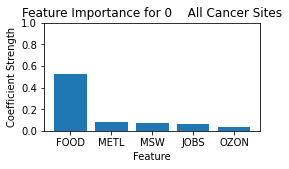

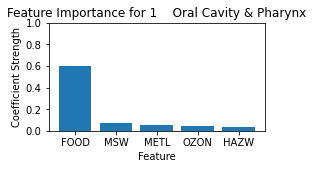

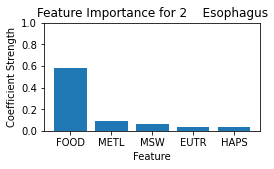

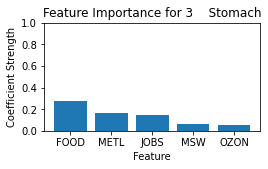

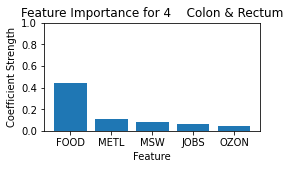

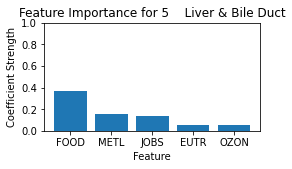

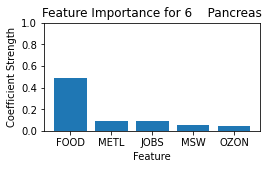

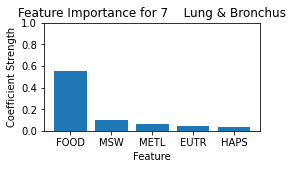

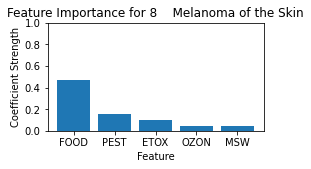

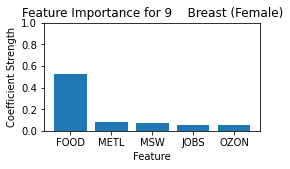

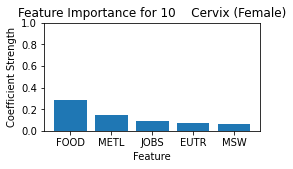

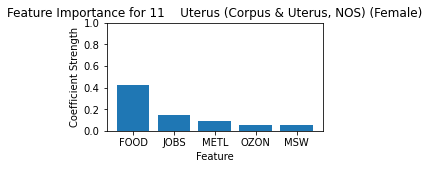

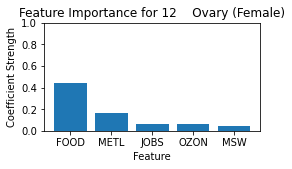

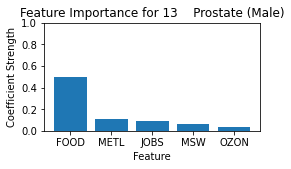

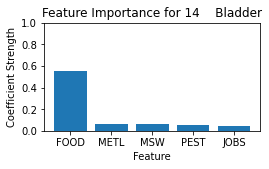

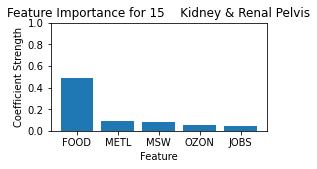

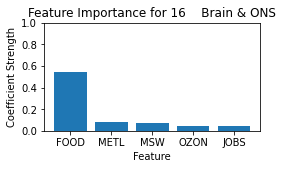

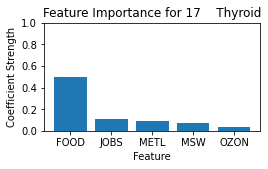

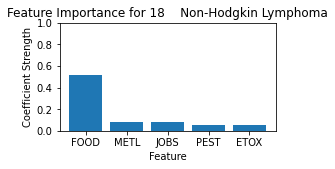

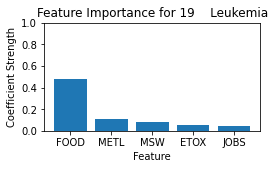

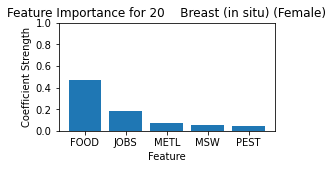

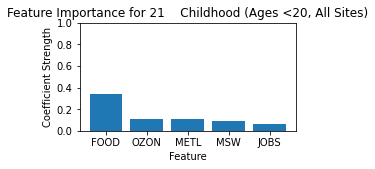

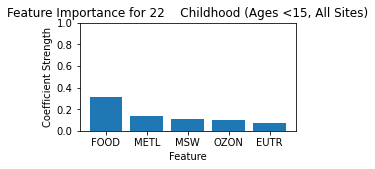

In [81]:
sum1 = 0

for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    #x1=newData[['FOOD','ETOX',"JOBS","METL","MSW"]]
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 100,
                                      max_depth= 8, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    r2_score=rf.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score

    #Feature Importance
    print("Feature Importance")
    features=rf.feature_importances_
    #print(features)
    ind = np.argsort(features)[::-1]
    print("indecis:",ind)
    imp = features[ind]
    print("importances:",imp)
    cols =factors[ind]
    print("features:",cols)
    
    #plot the importance factors
    fig=plt.figure(figsize=(3,1.5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Feature Importance for {}'.format(discr))
    ax.bar( cols[:5].tolist(),imp[:5].tolist())
    ax.set_ylabel("Coefficient Strength")
    ax.set_xlabel("Feature")
    plt.ylim(0, 1)
    fig.show()
    print("\n")

print(f"Average score: {sum1/len(cancerVals)}")

# Logistic Regression

## Hypertuning

In [12]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [183]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [64,100,128,200,256,400,528,1000]}
lr = LogisticRegression(random_state = RSEED)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tr

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tr

ValueError: Unknown label type: 'continuous'

In [19]:
print(clf.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Logistic Regression Loop

In [13]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating Logistic Regression Model
    print("Creating Logistic Regression Model and Fitting the Data")
    lr = LogisticRegression(random_state=RSEED,solver='sag' ,max_iter=2000)

    # Fit on training data
    lr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=lr.score(X_test, y_test)
    print("score",r2_score)
    print("\n")
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Logistic Regression Model and Fitting the Data


ValueError: Unknown label type: 'continuous'

# SVR

## Hypertuning

In [82]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [23]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)


parameters={'C': [0.01,0.1,1],'epsilon':[0,0.001,0.01,0.1,1],'tol':[1e-5,1e-3,1e-1],'max_iter': [64,100,128,200,256,400,528,1000,2000]}
svr =LinearSVR(random_state = RSEED)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=100, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1],
                         'epsilon': [0, 0.001, 0.01, 0.1, 1],
                         'max_iter': [64, 100, 128, 200, 256, 400, 528, 1000,
                                      2000],
                         'tol': [1e-05, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
print(clf.best_params_)

{'C': 1, 'epsilon': 0.1, 'max_iter': 64, 'tol': 0.001}


## SVR Loop

In [16]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating SVR Model and Fitting the Data")
    svr = LinearSVR(random_state=0, C= 1, epsilon= 0, max_iter=64, tol= 0.1)

    # Fit on training data
    svr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=svr.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating SVR Model and Fitting the Data
score -0.017549044660424284
cancer type: 3
1    Oral Cavity & Pharynx
Creating SVR Model and Fitting the Data
score -0.01878244934500306
cancer type: 17
2    Esophagus
Creating SVR Model and Fitting the Data
score -0.15505755597593907
cancer type: 18
3    Stomach
Creating SVR Model and Fitting the Data
score -0.18647508404214497
cancer type: 20
4    Colon & Rectum
Creating SVR Model and Fitting the Data
score -0.0721860500250675
cancer type: 35
5    Liver & Bile Duct
Creating SVR Model and Fitting the Data
score -0.2587595984623656
cancer type: 40
6    Pancreas
Creating SVR Model and Fitting the Data
score -0.45747459664691864
cancer type: 47
7    Lung & Bronchus
Creating SVR Model and Fitting the Data
score -0.02222658384688514
cancer type: 53
8    Melanoma of the Skin
Creating SVR Model and Fitting the Data
score 0.006382376218478036
cancer type: 55
9    Breast (Female)
Creating SVR Model and Fitting the Dat

## Other Models

In [87]:
from sklearn import linear_model

cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1 = newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [88]:
ridge = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)

In [89]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Ridge Model and Fitting the Data")
    ridge = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)
    
    #Evaluation
    r2_score = ridge.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Ridge Model and Fitting the Data
score 0.9025716440951275
cancer type: 3
1    Oral Cavity & Pharynx
Creating Ridge Model and Fitting the Data
score 0.8737647883033777
cancer type: 17
2    Esophagus
Creating Ridge Model and Fitting the Data
score 0.8773831331720305
cancer type: 18
3    Stomach
Creating Ridge Model and Fitting the Data
score 0.7698276613277772
cancer type: 20
4    Colon & Rectum
Creating Ridge Model and Fitting the Data
score 0.8918640094051146
cancer type: 35
5    Liver & Bile Duct
Creating Ridge Model and Fitting the Data
score 0.8215960099034895
cancer type: 40
6    Pancreas
Creating Ridge Model and Fitting the Data
score 0.8974095256595276
cancer type: 47
7    Lung & Bronchus
Creating Ridge Model and Fitting the Data
score 0.8741241949022194
cancer type: 53
8    Melanoma of the Skin
Creating Ridge Model and Fitting the Data
score 0.7722141774247713
cancer type: 55
9    Breast (Female)
Creating Ridge Model and Fitting the 

In [20]:
from sklearn.linear_model import ElasticNet
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Elastic Net Model and Fitting the Data")
    eNet = ElasticNet(random_state=RSEED).fit(X_train, y_train)
    
    #Evaluation
    r2_score = eNet.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Elastic Net Model and Fitting the Data
score 0.0025520013628861356
cancer type: 3
1    Oral Cavity & Pharynx
Creating Elastic Net Model and Fitting the Data
score 0.0010854773382800165
cancer type: 17
2    Esophagus
Creating Elastic Net Model and Fitting the Data
score 0.008639073108377082
cancer type: 18
3    Stomach
Creating Elastic Net Model and Fitting the Data
score 0.04367918935355397
cancer type: 20
4    Colon & Rectum
Creating Elastic Net Model and Fitting the Data
score -0.0014016699587464654
cancer type: 35
5    Liver & Bile Duct
Creating Elastic Net Model and Fitting the Data
score 0.04474408258082785
cancer type: 40
6    Pancreas
Creating Elastic Net Model and Fitting the Data
score 0.021828315599029202
cancer type: 47
7    Lung & Bronchus
Creating Elastic Net Model and Fitting the Data
score 0.0019638840904487864
cancer type: 53
8    Melanoma of the Skin
Creating Elastic Net Model and Fitting the Data
score 0.015735348084074174

In [90]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Lasso Model and Fitting the Data")
    lasso = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)
    
    #Evaluation
    r2_score = lasso.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Lasso Model and Fitting the Data
score 0.8969623669548089
cancer type: 3
1    Oral Cavity & Pharynx
Creating Lasso Model and Fitting the Data
score 0.8683599829265045
cancer type: 17
2    Esophagus
Creating Lasso Model and Fitting the Data
score 0.8686486168615004
cancer type: 18
3    Stomach
Creating Lasso Model and Fitting the Data
score 0.7630405045273791
cancer type: 20
4    Colon & Rectum
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129173876.32710503, tolerance: 540730.6803087096
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104089.87067688466, tolerance: 352.4772922936618
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20399.624631353374, tolerance: 45.46706374828999
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

score 0.8884298993796352
cancer type: 35
5    Liver & Bile Duct
Creating Lasso Model and Fitting the Data
score 0.8103952526326066
cancer type: 40
6    Pancreas
Creating Lasso Model and Fitting the Data
score 0.8907012234529176
cancer type: 47
7    Lung & Bronchus
Creating Lasso Model and Fitting the Data
score 0.8661234589691071
cancer type: 53
8    Melanoma of the Skin
Creating Lasso Model and Fitting the Data
score 0.7738672640162452
cancer type: 55
9    Breast (Female)
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120003.74107478, tolerance: 476.1224101231196
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3441868.5987310726, tolerance: 7081.3557087095305
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 568306.1142631328, tolerance: 1017.5560758777921
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

score 0.9119726739449163
cancer type: 57
10    Cervix (Female)
Creating Lasso Model and Fitting the Data
score 0.8444291307872867
cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating Lasso Model and Fitting the Data
score 0.8611870193637076
cancer type: 61
12    Ovary (Female)
Creating Lasso Model and Fitting the Data
score 0.8924470681234309
cancer type: 66
13    Prostate (Male)
Creating Lasso Model and Fitting the Data
score 0.8604717605166988
cancer type: 71
14    Bladder
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23920.848832219257, tolerance: 120.54657355221165
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2043102.9762834574, tolerance: 7212.901926949384
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383065.7452778023, tolerance: 941.5332523483819
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

score 0.8763144323988025
cancer type: 72
15    Kidney & Renal Pelvis
Creating Lasso Model and Fitting the Data
score 0.8941784397794621
cancer type: 76
16    Brain & ONS
Creating Lasso Model and Fitting the Data
score 0.9108811920661329
cancer type: 80
17    Thyroid
Creating Lasso Model and Fitting the Data
score 0.8766125180945074
cancer type: 86
18    Non-Hodgkin Lymphoma
Creating Lasso Model and Fitting the Data
score 0.8470254455956951
cancer type: 90
19    Leukemia
Creating Lasso Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200431.07560445534, tolerance: 639.5637844049255
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275779.06712095684, tolerance: 1079.1091954400374
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169231.46859119923, tolerance: 510.6279533059732
  positive)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

score 0.8490187844670306
cancer type: 400
20    Breast (in situ) (Female)
Creating Lasso Model and Fitting the Data
score 0.858275855850356
cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating Lasso Model and Fitting the Data
score 0.8898610310910218
cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating Lasso Model and Fitting the Data
score 0.8906117890087304
Average score: 0.864774596122108


In [91]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating SVR Model
    print("Creating Lasso Model and Fitting the Data")
    lasso = linear_model.LassoLars(alpha=0.01).fit(X_train, y_train)
    
    #Evaluation
    r2_score = lasso.score(X_test, y_test)
    print("score", r2_score)
    sum1 += r2_score

print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating Lasso Model and Fitting the Data
score 0.901807204254413
cancer type: 3
1    Oral Cavity & Pharynx
Creating Lasso Model and Fitting the Data
score 0.8911905465481343
cancer type: 17
2    Esophagus
Creating Lasso Model and Fitting the Data
score 0.7198206898946616
cancer type: 18
3    Stomach
Creating Lasso Model and Fitting the Data
score 0.8748911764137646
cancer type: 20
4    Colon & Rectum
Creating Lasso Model and Fitting the Data
score 0.9100972503406626
cancer type: 35
5    Liver & Bile Duct
Creating Lasso Model and Fitting the Data
score 0.8708546869209388
cancer type: 40
6    Pancreas
Creating Lasso Model and Fitting the Data
score 0.8999386954324663
cancer type: 47
7    Lung & Bronchus
Creating Lasso Model and Fitting the Data
score 0.8744464744824003
cancer type: 53
8    Melanoma of the Skin
Creating Lasso Model and Fitting the Data
score 0.8042425692522832
cancer type: 55
9    Breast (Female)
Creating Lasso Model and Fitting the D

In [92]:
lasso.coef_

array([ 0.        ,  0.        ,  2.41646587,  0.99500504,  2.80908242,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.1308057 ,
        0.        ,  0.        , -0.30420355,  2.11201954,  0.3436754 ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [93]:
lasso.intercept_

2.7861377108983127

In [94]:
import numpy as np
np.savetxt("weights2.csv", lasso.coef_, delimiter=",")

In [95]:
lasso.predict(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]).reshape(1, -1))

array([116.54926839])

# Multitask

In [11]:
data

,locale,fips,areatype,cancer,stateFIPS,state,cancer_description,annual_count_avg,incidence rate_per_100000,incidence rate_lower_95_confidence,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,county,1,1,alabama,All Cancer Sites,304,495.6,470.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
1,"Autauga County(6,10)",1001,county,3,1,alabama,Oral Cavity & Pharynx,8,13.5,9.6,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
2,"Autauga County(6,10)",1001,county,17,1,alabama,Esophagus,0,0.0,0.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
3,"Autauga County(6,10)",1001,county,18,1,alabama,Stomach,6,9.1,6.0,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
4,"Autauga County(6,10)",1001,county,20,1,alabama,Colon & Rectum,32,52.2,44.2,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,0.000069,1050.867678,9.764524,168.936475,27.485562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,county,86,56,wyoming,Non-Hodgkin Lymphoma,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72055,"Weston County(6,10)",56045,county,90,56,wyoming,Leukemia,0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72056,"Weston County(6,10)",56045,county,400,56,wyoming,Breast (in situ) (Female),0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450
72057,"Weston County(6,10)",56045,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",0,0.0,0.0,...,0.000002,31.285543,0.491881,1971.904410,8.367255e-07,0.000002,0.159930,3.642929,28.875893,0.122450


In [12]:
data2 = pd.read_csv("avg_count_per_cancer_per_fips.csv")
data2

,fips,1,3,17,18,20,35,40,47,53,...,66,71,72,76,80,86,90,400,515,516
0,1001,304,8,0,6,32,6,8,45,18,...,32,11,13,4,7,9,8,8,3,0
1,1003,1189,40,14,13,108,22,34,199,81,...,121,56,44,16,14,44,32,36,11,7
2,1005,145,7,0,0,14,0,4,23,4,...,22,6,7,0,0,5,0,4,0,0
3,1007,128,4,0,0,12,0,4,21,3,...,16,4,7,0,4,4,3,3,0,0
4,1009,317,8,0,5,28,5,7,52,15,...,38,12,13,4,6,12,10,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,56037,162,6,0,0,13,0,5,18,9,...,25,8,6,4,5,7,5,4,0,0
3129,56039,98,0,0,0,6,0,0,4,12,...,17,5,0,0,3,6,4,4,0,0
3130,56041,78,0,0,0,6,0,0,7,6,...,8,4,3,0,4,4,0,0,0,0
3131,56043,44,0,0,0,5,0,0,5,0,...,5,0,0,0,0,0,0,0,0,0


In [13]:
data.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'ACID', 'ENRG', 'ETOX', 'EUTR',
       'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS',
       'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG',
       'VADD', 'WATR'],
      dtype='object')

In [14]:

#selecting data for the specific cancer type
cancerData=data["cancer"]==1
newData=data[cancerData]
newData=newData[['fips','ACID', 'ENRG', 'ETOX', 'EUTR',
       'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS',
       'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG',
       'VADD', 'WATR']]
newData

,fips,ACID,ENRG,ETOX,EUTR,FOOD,GCC,HAPS,HAZW,HC,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,1001,1.049800,2609.156621,3.932211,0.091967,1.070762,375.880086,0.028596,0.038196,1.392760e-08,...,0.000177,0.000000,3.332971,1558.288943,8.205763e-06,6.937696e-05,1050.867678,9.764524,168.936475,27.485562
23,1003,0.280475,15.561882,7.987962,0.290754,7.601684,121.748265,0.062129,0.932868,5.461040e-08,...,0.000130,44.123480,28.367361,12.236171,1.025729e-05,1.910217e-04,3.325711,9.430919,1620.234233,4.251408
46,1005,0.210885,0.010255,4.445820,0.027651,0.184201,41.021013,0.014290,0.006247,3.207004e-08,...,0.000007,0.000000,1.000043,0.000000,2.608045e-07,5.804013e-05,0.010255,7.502860,65.168132,0.701977
69,1007,0.059937,30.656456,2.418462,0.009070,0.112118,11.566748,0.004779,0.007600,9.819009e-09,...,0.000010,0.000000,0.520036,0.000000,8.704410e-07,3.238827e-05,30.656456,2.133152,24.050294,0.384009
92,1009,0.066937,0.017388,0.668729,0.008988,0.313152,13.374711,0.006907,0.014673,1.074744e-08,...,0.000009,0.000000,1.277899,0.000000,4.780418e-06,1.113430e-05,0.017388,2.409639,60.574602,0.160868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71944,56037,1.288242,6846.474113,1.671191,0.242657,1.548135,468.448494,0.094393,0.074211,2.360126e-07,...,0.000158,3197.779327,6.811835,6844.091086,6.462275e-06,1.788926e-05,2.383027,41.472524,654.507956,15.008485
71967,56039,0.083954,1.400183,17.679180,0.056704,3.572117,47.566459,0.090532,0.267253,3.504199e-08,...,0.000049,0.010181,12.942471,0.656189,5.078643e-06,4.713616e-04,0.743994,3.222444,721.506003,4.511225
71990,56041,0.192684,3509.922266,0.227323,0.027889,0.588789,62.957404,0.020252,0.015144,3.722919e-08,...,0.000022,730.743964,2.413328,3509.893777,1.139964e-06,1.078417e-06,0.028489,6.938709,202.008187,1.091574
72013,56043,0.084944,1652.835530,0.073477,0.012313,0.141232,17.695252,0.008530,0.004346,1.659289e-08,...,0.000001,0.000000,0.774102,1652.832375,3.911731e-07,5.269024e-10,0.003155,3.325439,51.721583,0.083898


In [15]:
df_inner = newData.merge(data2,on='fips', how='inner')

In [16]:
df_inner

,fips,ACID,ENRG,ETOX,EUTR,FOOD,GCC,HAPS,HAZW,HC,...,66,71,72,76,80,86,90,400,515,516
0,1001,1.049800,2609.156621,3.932211,0.091967,1.070762,375.880086,0.028596,0.038196,1.392760e-08,...,32,11,13,4,7,9,8,8,3,0
1,1003,0.280475,15.561882,7.987962,0.290754,7.601684,121.748265,0.062129,0.932868,5.461040e-08,...,121,56,44,16,14,44,32,36,11,7
2,1005,0.210885,0.010255,4.445820,0.027651,0.184201,41.021013,0.014290,0.006247,3.207004e-08,...,22,6,7,0,0,5,0,4,0,0
3,1007,0.059937,30.656456,2.418462,0.009070,0.112118,11.566748,0.004779,0.007600,9.819009e-09,...,16,4,7,0,4,4,3,3,0,0
4,1009,0.066937,0.017388,0.668729,0.008988,0.313152,13.374711,0.006907,0.014673,1.074744e-08,...,38,12,13,4,6,12,10,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,56037,1.288242,6846.474113,1.671191,0.242657,1.548135,468.448494,0.094393,0.074211,2.360126e-07,...,25,8,6,4,5,7,5,4,0,0
3129,56039,0.083954,1.400183,17.679180,0.056704,3.572117,47.566459,0.090532,0.267253,3.504199e-08,...,17,5,0,0,3,6,4,4,0,0
3130,56041,0.192684,3509.922266,0.227323,0.027889,0.588789,62.957404,0.020252,0.015144,3.722919e-08,...,8,4,3,0,4,4,0,0,0,0
3131,56043,0.084944,1652.835530,0.073477,0.012313,0.141232,17.695252,0.008530,0.004346,1.659289e-08,...,5,0,0,0,0,0,0,0,0,0


In [17]:
df_inner.columns

Index(['fips', 'ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW',
       'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW',
       'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD', 'WATR', '1', '3', '17',
       '18', '20', '35', '40', '47', '53', '55', '57', '58', '61', '66', '71',
       '72', '76', '80', '86', '90', '400', '515', '516'],
      dtype='object')

In [162]:
from sklearn.linear_model import MultiTaskElasticNet

#splitting to test and train
x1=df_inner.loc[:, 'ACID':'WATR']
y = df_inner.loc[:, '1':'516']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)
    

print("Creating Elastic Net Model and Fitting the Data")
eNet = MultiTaskElasticNet(random_state=RSEED).fit(X_train, y_train)
    
#Evaluation
r2_score = eNet.score(X_test, y_test)
print("score", r2_score)


Creating Elastic Net Model and Fitting the Data
score 0.7833450560976941


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [143]:
eNet.coef_

array([[ 8.37181866e+00, -1.24433920e+02,  2.09230739e+02,
         1.47684487e+02,  2.03322154e+02,  1.40105145e-01,
         1.41609391e+02,  4.77325283e+01,  1.59928936e+01,
         2.10217281e-01,  1.08479285e+02,  1.85312592e+00,
         8.86433312e+01, -4.74213475e+01,  1.99327362e+02,
        -5.61299504e-01,  1.05069220e+02, -1.25449429e+02,
         1.37438124e+02,  2.14209348e+02, -6.73538515e+01,
         4.45333680e+01, -5.27991215e+00, -3.20671074e+01],
       [ 3.66886887e-01, -2.93626237e+00,  5.52049306e+00,
         3.41931976e+00,  5.08796577e+00,  5.12818972e-02,
         3.61612670e+00,  1.32436636e+00,  4.96944701e-01,
        -4.27741465e-03,  2.86138777e+00,  4.64858435e-02,
         2.04714566e+00, -9.31672895e-01,  4.53518837e+00,
         7.94234604e-02,  2.63815442e+00, -2.96288891e+00,
         3.17733471e+00,  5.62250431e+00, -1.52836866e+00,
         1.30025210e+00, -1.17377908e-01, -7.02999679e-01],
       [ 1.32756690e-01, -1.10061048e+00,  2.03582758e

In [144]:
np.savetxt("enet_multi.csv", eNet.coef_, delimiter=",")

In [23]:
from sklearn.linear_model import MultiTaskLasso

#splitting to test and train
x1=df_inner.loc[:, 'ACID':'WATR']
y = df_inner.loc[:, '1':'516']

X_train, X_test, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

# scaler = StandardScaler()
# scaler.fit(X_train1)

# X_train = scaler.transform(X_train1)
# X_test = scaler.transform(X_test1)


print("Creating Elastic Net Model and Fitting the Data")
lasso = MultiTaskLasso(random_state=RSEED).fit(X_train, y_train)

#Evaluation
r2_score = lasso.score(X_test, y_test)
print("score", r2_score)


Creating Elastic Net Model and Fitting the Data
score 0.8971703578283284


In [26]:
x1.shape

(3133, 24)

In [27]:
y.shape

(3133, 23)

In [25]:
lasso.coef_

array([[ 1.31305521e+02,  3.54706264e-02,  3.72477814e+00,
         2.93481216e+01,  1.76208325e+02,  7.72720322e-01,
         4.52790189e+02, -2.53912124e+00, -0.00000000e+00,
        -0.00000000e+00, -6.77065857e+01, -0.00000000e+00,
         0.00000000e+00,  6.02092244e-02, -0.00000000e+00,
         1.69659369e-02, -5.23750588e+00, -3.80765983e-02,
        -0.00000000e+00, -0.00000000e+00, -1.48947769e-02,
        -6.56770163e+00, -1.84191728e-01, -1.44855789e+01],
       [ 3.61154947e+00,  8.63034490e-04,  1.61370347e-01,
        -2.68603539e+00,  4.37078544e+00,  1.83832182e-02,
         1.12264459e+01, -1.30604657e-02, -0.00000000e+00,
        -0.00000000e+00, -1.32961594e+00, -0.00000000e+00,
        -0.00000000e+00,  1.90200564e-03, -0.00000000e+00,
         6.06621228e-04, -1.22950259e-01, -9.22034700e-04,
        -0.00000000e+00, -0.00000000e+00,  3.60003204e-04,
        -1.50972588e-01, -4.59390627e-03, -3.89348933e-01],
       [ 1.24175857e+00,  3.66009434e-04,  6.70989690e

In [147]:
np.savetxt("lasso_multi.csv", lasso.coef_, delimiter=",")

In [24]:
from sklearn.externals import joblib
joblib.dump(lasso, 'Model2.sav')

['Model2.sav']

In [29]:
lasso.predict(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]).reshape(1, -1))

array([[ 3.06936105e+03,  6.69687667e+01,  4.67491741e+01,
         8.30248521e+01,  5.17824873e+02,  6.74806066e-01,
         1.17078368e+02,  6.90451944e+02, -8.11393688e+01,
         4.38819250e+02,  2.99401474e+00,  1.54148036e+02,
         3.86416393e+01,  2.66210041e+02,  2.01581974e+02,
         1.16681326e+02, -5.59537713e+00, -8.60015206e+01,
         1.25556151e+02,  2.71503365e+01, -6.82640781e+01,
        -7.99107697e+00, -1.73031148e+01]])